In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
from pycocotools.coco import COCO
import random
import pycocotools.mask as maskUtils
import torch
from mmdet.utils.timer import Timer

In [2]:
tmp = torch.load('demo/tmp/solo_positive.pth')
all_level_points, labels, gt_ids, img_metas, gt_bboxes, gt_masks, gt_labels = tmp

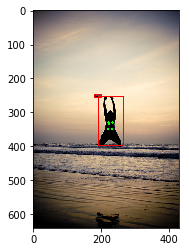

In [3]:
img1 = cv2.imread(img_metas[0]['filename'])
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
if img_metas[0]['flip']:
    img1 = cv2.flip(img1, 1)
ppp = []
for i in range(5):
    p = all_level_points[i]
    l = labels[i]
    pp = p[l.chunk(2, 0)[0]>0]
    ppp.append(pp)
ppp = torch.cat(ppp)
ppp /= img_metas[0]['scale_factor']
for p in ppp:
    cv2.circle(img1, tuple(p.int().tolist()), 2, (0,255,0), 4)
gb = gt_bboxes[0]/img_metas[0]['scale_factor']
for b in gb:
    x0, y0, x1, y1 = b.int().tolist()
    img1 = cv2.rectangle(img1, (x0, y0), (x1, y1), (255, 0, 0), 2)
plt.imshow(img1)

[tensor([8], device='cuda:0'), tensor([3, 8, 6], device='cuda:0'), tensor([], device='cuda:0', dtype=torch.int64), tensor([], device='cuda:0', dtype=torch.int64), tensor([], device='cuda:0', dtype=torch.int64)]


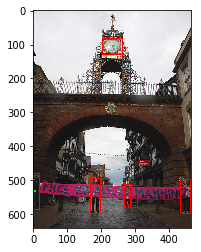

In [4]:
img2 = cv2.imread(img_metas[1]['filename'])
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
if img_metas[1]['flip']:
    img2 = cv2.flip(img2, 1)
ppp = []
ids = []
for i in range(5):
    p = all_level_points[i]
    l = labels[i]
    id = gt_ids[i]
    pp = p[l.chunk(2, 0)[1]>0]
    idd = id.chunk(2, 0)[1][l.chunk(2, 0)[1]>0]
    ids.append(idd)
    ppp.append(pp)
ppp = torch.cat(ppp)
ppp /= img_metas[1]['scale_factor']
for p in ppp:
    cv2.circle(img2, tuple(p.int().tolist()), 2, (0,255,0), 4)
gb = gt_bboxes[1]/img_metas[1]['scale_factor']
for b in gb:
    x0, y0, x1, y1 = b.int().tolist()
    img2 = cv2.rectangle(img2, (x0, y0), (x1, y1), (255, 0, 0), 2)
plt.imshow(img2)
print(ids)

In [ ]:
gt_mask = torch.load('./demo/tmp.pth')#.cpu()

In [ ]:
with Timer(verbose=True):
    M = cv2.moments(gt_mask)
    x, y = M['m10']/M['m00'], M['m01']/M['m00'] 
gt_mask = gt_mask.astype(np.uint8)
with Timer(verbose=True):
    M = cv2.moments(gt_mask)
    x, y = M['m10']/M['m00'], M['m01']/M['m00'] 

In [ ]:
gt_mask = gt_mask.astype(np.float)
#contour, _ = cv2.findContours(gt_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
gt_mask_2 = cv2.resize(gt_mask, (0,0), fx=0.125, fy=0.125)

In [ ]:
gt_mask_3 = cv2.resize(gt_mask_2, (0,0), fx=8, fy=8)

In [ ]:
plt.imshow(gt_mask)

In [ ]:
plt.imshow(gt_mask_3)

In [ ]:
canvas = np.zeros_like(gt_mask)
cv2.drawContours(canvas, contour, -1, 1, 3)

In [ ]:
plt.imshow(canvas)

In [ ]:
plt.imshow(gt_mask)

In [ ]:
coco = COCO('./data/coco/annotations/instances_val2017.json')

In [ ]:
#coco.loadImgs(coco.getImgIds()[int(1000*random.random())])
contour = coco.loadAnns(coco.getAnnIds()[int(1000*random.random())])['segmentation']

In [ ]:
canvas = np.zeros((100, 100))
cv2.circle(canvas, (50, 50), 5, (255, 255, 255), thickness=1)

In [ ]:
plt.imshow(canvas)